<a href="https://colab.research.google.com/github/JuanD4vy/SDN_Project/blob/main/CIC_SDN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Universidad Militar Nueva Granada***
**Juan David Aviles Palma**

**Programa de ingeniería en Telecomunicaciones - Semillero Maxwell GISSIC**

#***0. Importar librerías y cargar conjuntos de datos***

In [ ]:
# Conectar con Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importación de librerías
import time
import numpy as np
import random
import pandas as pd
import ipaddress
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# Semilla para reproducibilidad
np.random.seed(0)
random.seed(0)

In [ ]:
# Cargar datasets
attack_train = pd.read_csv('/content/drive/MyDrive/Ataque/CICFlowMeter/Ataque_C.csv')
attack_test = pd.read_csv('/content/drive/MyDrive/Ataque/CICFlowMeter/Ataque_PC.csv')
normal_train = pd.read_csv('/content/drive/MyDrive/Normal/CICFlowMeter/Normal_C.csv')
normal_test = pd.read_csv('/content/drive/MyDrive/Normal/CICFlowMeter/Normal_PC.csv')

#***1. Exploración y preprocesamiento de datos***

In [ ]:
# Muestra el tamaño del dataset de flujo normal
print("Dimensiones del dataset de flujo normal (Entrenamiento):", normal_train.shape)
print("Dimensiones del dataset de flujo normal (Prueba):", normal_test.shape)

Dimensiones del dataset de flujo normal (Entrenamiento): (248397, 82)
Dimensiones del dataset de flujo normal (Prueba): (56284, 82)


In [ ]:
# Muestra el tamaño del dataset de flujo de ataque
print("Dimensiones del dataset de flujo de ataque (Entrenamiento):", attack_train.shape)
print("Dimensiones del dataset de flujo de ataque (Prueba):", attack_test.shape)

Dimensiones del dataset de flujo de ataque (Entrenamiento): (260321, 82)
Dimensiones del dataset de flujo de ataque (Prueba): (55849, 82)


In [ ]:
# Añadir etiquetas (Label)
attack_train['Label'] = 1
attack_test['Label'] = 1
normal_train['Label'] = 0
normal_test['Label'] = 0

In [ ]:
# Combinar los datasets de entrenamiento
train_dataset = pd.concat([attack_train, normal_train], ignore_index=True)
train_dataset = shuffle(train_dataset, random_state=42)

In [ ]:
# Mantener el conjunto de prueba separado
test_dataset = pd.concat([attack_test, normal_test], ignore_index=True)
test_dataset = shuffle(test_dataset, random_state=42)

In [ ]:
train_dataset.head(10)  # Observar 10 primeras filas del dataset

,src_ip,dst_ip,src_port,dst_port,protocol,timestamp,flow_duration,flow_byts_s,flow_pkts_s,fwd_pkts_s,...,fwd_blk_rate_avg,bwd_blk_rate_avg,fwd_seg_size_avg,bwd_seg_size_avg,cwe_flag_count,subflow_fwd_pkts,subflow_bwd_pkts,subflow_fwd_byts,subflow_bwd_byts,Label
8683,10.0.0.5,10.0.0.20,34588,80,6,2025-02-24 12:05:31,38167825.0,11.213633,0.157200,0.078600,...,0.0,0.000000e+00,76.666667,66.000000,0,3,3,230,198,1
61524,10.0.0.2,10.0.0.20,57940,80,6,2025-02-26 15:55:16,3446003.0,3682.817455,4.933252,2.901913,...,0.0,2.238848e+06,102.900000,1666.000000,0,10,7,1029,11662,1
298236,10.0.0.1,10.0.0.20,42304,80,6,2025-02-24 17:32:38,807981.0,15349.370839,19.802446,9.901223,...,0.0,4.491600e+08,79.625000,1470.625000,0,8,8,637,11765,0
326306,10.0.0.9,10.0.0.20,47994,80,6,2025-02-26 08:26:20,2718131.0,13324.229038,11.772795,4.782698,...,0.0,1.220471e+08,97.692308,1839.315789,0,13,19,1270,34947,0
131110,10.0.0.4,10.0.0.20,56142,80,6,2025-02-26 16:17:50,1747399.0,7029.304698,6.295071,3.433675,...,0.0,0.000000e+00,125.500000,2306.000000,0,6,5,753,11530,1
455804,10.0.0.7,10.0.0.20,43496,80,6,2025-03-06 10:55:18,3171.0,364553.768527,3153.579313,1892.147588,...,0.0,0.000000e+00,90.833333,152.750000,0,6,4,545,611,0
310340,10.0.0.1,10.0.0.20,46908,80,6,2025-02-24 17:37:20,18901508.0,28180.978999,9.152709,5.502206,...,0.0,0.000000e+00,111.567308,7551.594203,0,104,69,11603,521060,0
439987,10.0.0.9,10.0.0.20,54924,80,6,2025-03-05 17:25:42,6486579.0,1973.613518,2.929125,1.541645,...,0.0,1.352892e+08,97.100000,1314.555556,0,10,9,971,11831,0
359963,10.0.0.3,10.0.0.20,43722,80,6,2025-03-03 09:51:05,39483.0,5116.125928,75.982068,50.654712,...,0.0,0.000000e+00,64.000000,74.000000,0,2,1,128,74,0
262434,10.0.0.1,10.0.0.20,47652,80,6,2025-02-24 11:26:51,507093.0,388031.386748,124.237566,76.908969,...,0.0,0.000000e+00,110.230769,8019.541667,0,39,24,4299,192469,0


In [ ]:
# Mostrar la nueva forma del dataset
print("Dimensiones del dataset combinado:", train_dataset.shape)

Dimensiones del dataset combinado: (508718, 83)


In [ ]:
# Mostrar la nueva forma del dataset
print("Dimensiones del dataset combinado:", test_dataset.shape)

Dimensiones del dataset combinado: (112133, 83)


In [ ]:
print(train_dataset.columns) # Se muestran el número de columnas

Index(['src_ip', 'dst_ip', 'src_port', 'dst_port', 'protocol', 'timestamp',
       'flow_duration', 'flow_byts_s', 'flow_pkts_s', 'fwd_pkts_s',
       'bwd_pkts_s', 'tot_fwd_pkts', 'tot_bwd_pkts', 'totlen_fwd_pkts',
       'totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min',
       'fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max',
       'bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std', 'pkt_len_max',
       'pkt_len_min', 'pkt_len_mean', 'pkt_len_std', 'pkt_len_var',
       'fwd_header_len', 'bwd_header_len', 'fwd_seg_size_min',
       'fwd_act_data_pkts', 'flow_iat_mean', 'flow_iat_max', 'flow_iat_min',
       'flow_iat_std', 'fwd_iat_tot', 'fwd_iat_max', 'fwd_iat_min',
       'fwd_iat_mean', 'fwd_iat_std', 'bwd_iat_tot', 'bwd_iat_max',
       'bwd_iat_min', 'bwd_iat_mean', 'bwd_iat_std', 'fwd_psh_flags',
       'bwd_psh_flags', 'fwd_urg_flags', 'bwd_urg_flags', 'fin_flag_cnt',
       'syn_flag_cnt', 'rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt',
       'urg_flag

In [ ]:
# Información general del dataset
print(train_dataset.info())

<class 'pandas.core.frame.DataFrame'>
Index: 508718 entries, 8683 to 121958
Data columns (total 83 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   src_ip             508718 non-null  object 
 1   dst_ip             508718 non-null  object 
 2   src_port           508718 non-null  int64  
 3   dst_port           508718 non-null  int64  
 4   protocol           508718 non-null  int64  
 5   timestamp          508718 non-null  object 
 6   flow_duration      508718 non-null  float64
 7   flow_byts_s        508718 non-null  float64
 8   flow_pkts_s        508718 non-null  float64
 9   fwd_pkts_s         508718 non-null  float64
 10  bwd_pkts_s         508718 non-null  float64
 11  tot_fwd_pkts       508718 non-null  int64  
 12  tot_bwd_pkts       508718 non-null  int64  
 13  totlen_fwd_pkts    508718 non-null  int64  
 14  totlen_bwd_pkts    508718 non-null  int64  
 15  fwd_pkt_len_max    508718 non-null  float64
 16  fwd_

#***2. Análisis de datos***

In [ ]:
# Estadísticas descriptivas
print(train_dataset.describe())

            src_port       dst_port       protocol  flow_duration  \
count  508718.000000  508718.000000  508718.000000   5.087180e+05   
mean    45280.372943    1378.151988       6.000908   1.497264e+07   
std     11167.815979    7722.768362       0.099945   2.324266e+07   
min        80.000000      80.000000       6.000000   0.000000e+00   
25%     38902.000000      80.000000       6.000000   1.131930e+06   
50%     45866.000000      80.000000       6.000000   3.407547e+06   
75%     53556.000000      80.000000       6.000000   1.912790e+07   
max     60998.000000   60998.000000      17.000000   1.442208e+08   

        flow_byts_s   flow_pkts_s      fwd_pkts_s      bwd_pkts_s  \
count  5.087180e+05  5.087180e+05   508718.000000   508718.000000   
mean   1.869571e+06  1.184027e+04     6180.610285     5659.657007   
std    1.722512e+07  8.481950e+04    42933.883670    41954.253024   
min    0.000000e+00  0.000000e+00        0.000000        0.000000   
25%    3.992044e+02  8.275050e-01

In [ ]:
# Verificar valores nulos
print("Valores nulos por columna:\n", train_dataset.isnull().sum())

Valores nulos por columna:
 src_ip              0
dst_ip              0
src_port            0
dst_port            0
protocol            0
                   ..
subflow_fwd_pkts    0
subflow_bwd_pkts    0
subflow_fwd_byts    0
subflow_bwd_byts    0
Label               0
Length: 83, dtype: int64


In [ ]:
# Verificar valores nulos
print("Valores nulos por columna:\n", test_dataset.isnull().sum())

Valores nulos por columna:
 src_ip              0
dst_ip              0
src_port            0
dst_port            0
protocol            0
                   ..
subflow_fwd_pkts    0
subflow_bwd_pkts    0
subflow_fwd_byts    0
subflow_bwd_byts    0
Label               0
Length: 83, dtype: int64


In [ ]:
print(train_dataset['Label'].value_counts(normalize=True)) # Porcentajes del output

Label
1    0.51172
0    0.48828
Name: proportion, dtype: float64


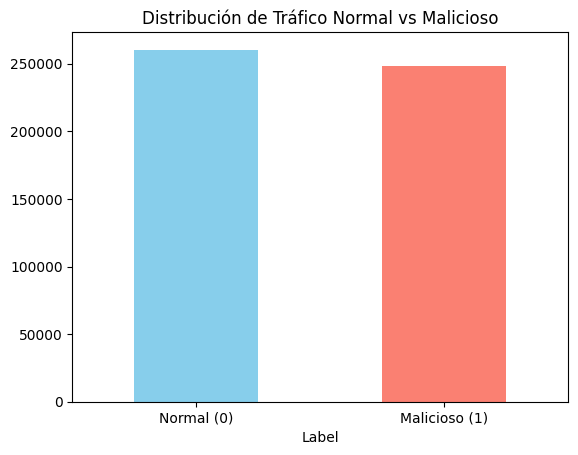

In [ ]:
import matplotlib.pyplot as plt

train_dataset['Label'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribución de Tráfico Normal vs Malicioso')
plt.xticks([0, 1], ['Normal (0)', 'Malicioso (1)'], rotation=0)
plt.show()

In [ ]:
# Convertir IPs a valores numéricos
def ip_to_int(ip):
    return int(ipaddress.ip_address(ip))

if 'src_ip' in train_dataset.columns and 'dst_ip' in train_dataset.columns:
    train_dataset['src_ip'] = train_dataset['src_ip'].apply(ip_to_int)
    train_dataset['dst_ip'] = train_dataset['dst_ip'].apply(ip_to_int)
    test_dataset['src_ip'] = test_dataset['src_ip'].apply(ip_to_int)
    test_dataset['dst_ip'] = test_dataset['dst_ip'].apply(ip_to_int)

In [ ]:
# Asegurar que todos los datos sean numéricos
train_dataset = train_dataset.select_dtypes(include=['number'])
test_dataset = test_dataset.select_dtypes(include=['number'])

In [ ]:
# Normalización de características
scaler = StandardScaler()
X_train = train_dataset.drop('Label', axis=1)
y_train = train_dataset['Label']
X_test = test_dataset.drop('Label', axis=1)
y_test = test_dataset['Label']

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Confirmar dimensiones
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

Tamaño del conjunto de entrenamiento: (508718, 81)
Tamaño del conjunto de prueba: (112133, 81)


In [ ]:
train_dataset.head(10)  # Observar 10 primeras filas del dataset

,src_ip,dst_ip,src_port,dst_port,protocol,flow_duration,flow_byts_s,flow_pkts_s,fwd_pkts_s,bwd_pkts_s,...,fwd_blk_rate_avg,bwd_blk_rate_avg,fwd_seg_size_avg,bwd_seg_size_avg,cwe_flag_count,subflow_fwd_pkts,subflow_bwd_pkts,subflow_fwd_byts,subflow_bwd_byts,Label
8683,167772165,167772180,34588,80,6,38167825.0,11.213633,0.157200,0.078600,0.078600,...,0.0,0.000000e+00,76.666667,66.000000,0,3,3,230,198,1
61524,167772162,167772180,57940,80,6,3446003.0,3682.817455,4.933252,2.901913,2.031339,...,0.0,2.238848e+06,102.900000,1666.000000,0,10,7,1029,11662,1
298236,167772161,167772180,42304,80,6,807981.0,15349.370839,19.802446,9.901223,9.901223,...,0.0,4.491600e+08,79.625000,1470.625000,0,8,8,637,11765,0
326306,167772169,167772180,47994,80,6,2718131.0,13324.229038,11.772795,4.782698,6.990097,...,0.0,1.220471e+08,97.692308,1839.315789,0,13,19,1270,34947,0
131110,167772164,167772180,56142,80,6,1747399.0,7029.304698,6.295071,3.433675,2.861396,...,0.0,0.000000e+00,125.500000,2306.000000,0,6,5,753,11530,1
455804,167772167,167772180,43496,80,6,3171.0,364553.768527,3153.579313,1892.147588,1261.431725,...,0.0,0.000000e+00,90.833333,152.750000,0,6,4,545,611,0
310340,167772161,167772180,46908,80,6,18901508.0,28180.978999,9.152709,5.502206,3.650502,...,0.0,0.000000e+00,111.567308,7551.594203,0,104,69,11603,521060,0
439987,167772169,167772180,54924,80,6,6486579.0,1973.613518,2.929125,1.541645,1.387480,...,0.0,1.352892e+08,97.100000,1314.555556,0,10,9,971,11831,0
359963,167772163,167772180,43722,80,6,39483.0,5116.125928,75.982068,50.654712,25.327356,...,0.0,0.000000e+00,64.000000,74.000000,0,2,1,128,74,0
262434,167772161,167772180,47652,80,6,507093.0,388031.386748,124.237566,76.908969,47.328597,...,0.0,0.000000e+00,110.230769,8019.541667,0,39,24,4299,192469,0


In [ ]:
test_dataset.head(10)  # Observar 10 primeras filas del dataset

,src_ip,dst_ip,src_port,dst_port,protocol,flow_duration,flow_byts_s,flow_pkts_s,fwd_pkts_s,bwd_pkts_s,...,fwd_blk_rate_avg,bwd_blk_rate_avg,fwd_seg_size_avg,bwd_seg_size_avg,cwe_flag_count,subflow_fwd_pkts,subflow_bwd_pkts,subflow_fwd_byts,subflow_bwd_byts,Label
84103,167772165,167772180,50828,80,6,4087017.0,3.034487e+03,3.914836,1.957418,1.957418,...,0.000000,8.637692e+07,79.625000,1470.625,0,8,8,637,11765,0
28089,167772162,167772180,50566,80,6,23743.0,5.180474e+05,463.294445,252.706061,210.588384,...,0.000000,0.000000e+00,128.333333,2306.000,0,6,5,770,11530,1
8563,167772162,167772180,60260,80,6,94500253.0,4.630675e+01,0.222222,0.179894,0.042328,...,1232.902847,0.000000e+00,241.411765,68.000,0,17,4,4104,272,1
28607,167772163,167772180,55958,80,6,476386.0,2.587817e+04,25.189657,14.693967,10.495690,...,0.000000,0.000000e+00,114.000000,2306.000,0,7,5,798,11530,1
19776,167772180,167772161,80,60876,6,2001784.0,4.056382e+02,2.497772,1.498663,0.999109,...,0.000000,0.000000e+00,226.666667,66.000,0,3,2,680,132,1
22229,167772167,167772180,57028,80,6,31633916.0,5.544682e+01,0.505786,0.252893,0.252893,...,0.000000,0.000000e+00,92.000000,127.250,0,8,8,736,1018,1
3113,167772167,167772180,52060,80,6,61680181.0,3.305762e+01,0.324253,0.162127,0.162127,...,0.000000,0.000000e+00,88.900000,115.000,0,10,10,889,1150,1
64478,167772166,167772180,47658,80,6,3259.0,1.317275e+06,3068.425898,1841.055539,1227.370359,...,0.000000,0.000000e+00,90.666667,937.250,0,6,4,544,3749,0
59540,167772166,167772180,36178,80,6,7515.0,5.712575e+05,1330.671989,798.403194,532.268796,...,0.000000,0.000000e+00,90.666667,937.250,0,6,4,544,3749,0
49728,167772163,167772180,49564,80,6,93422.0,1.303440e+05,107.041168,64.224701,42.816467,...,0.000000,0.000000e+00,118.833333,2866.000,0,6,4,713,11464,1


#***3. Entrenamiento del modelo***

In [ ]:
# Crear el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Entrenar el modelo
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

#***4. Evaluación***

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     56284
           1       1.00      0.99      0.99     55849

    accuracy                           0.99    112133
   macro avg       0.99      0.99      0.99    112133
weighted avg       0.99      0.99      0.99    112133



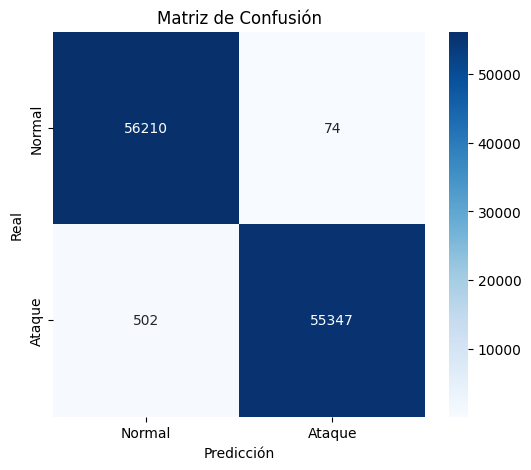

In [ ]:
import seaborn as sns

# Evaluación
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Ataque'], yticklabels=['Normal', 'Ataque'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()